In [16]:
import numpy as np
import pandas as pd

import os
working_dir = os.getcwd()
print(working_dir)
path = working_dir + '/spam.csv'
df = pd.read_csv(path)

/Users/santhoshym/Desktop/Bharath Intern Data Science/Task 1


In [17]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5426,ham,Oh yeah! And my diet just flew out the window,NaN,NaN,NaN
3580,ham,Ard 4 lor...,NaN,NaN,NaN
1212,ham,"Yo, the game almost over? Want to go to walmar...",NaN,NaN,NaN
4253,ham,"How about clothes, jewelry, and trips?",NaN,NaN,NaN
3513,ham,I always chat with you. In fact i need money c...,NaN,NaN,NaN


In [18]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning 
# 2. EDA (Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement

## Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [21]:
df.sample(5)

,v1,v2
3892,ham,Have you heard from this week?
2534,ham,Ok enjoy . R u there in home.
380,ham,I guess that's why you re worried. You must kn...
4137,ham,"Good! No, don‰Û÷t need any receipts‰ÛÓwell don..."
683,spam,Hi I'm sue. I am 20 years old and work as a la...


In [22]:
# re naming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
986,ham,I'm in office now . I will call you &lt;#&gt;...
3674,ham,Whos this am in class:-)
1963,ham,Yes :)it completely in out of form:)clark also...
2053,ham,Oh... I was thkin of goin yogasana at 10 den n...
416,ham,Alright i have a new goal now


In [23]:
# Library used to import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
# To replace ham to 0 and spam to 1
df['target'] = encoder.fit_transform(df['target'])

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# To check the Missing Values in the Data Set
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
# Check for Duplicate Values
df.duplicated().sum()

414

In [30]:
# Now we need to remove 414 Duplicate values 
df = df.drop_duplicates(keep='first')

In [31]:
# Check for Duplicate Values
df.duplicated().sum()

0

In [32]:
df.shape

(5158, 2)

## 2. EDA

In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df['target'].value_counts()

target
0    4516
1     642
Name: count, dtype: int64

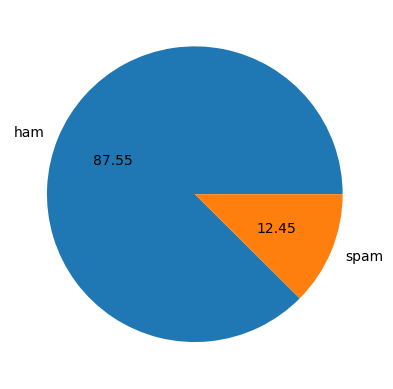

In [39]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [40]:
# Data is Imbalanced 

In [41]:
import nltk

In [42]:
!pip install nltk

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santhoshym/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [46]:
# Each SMS the Length [no of characters used]
df['num_characters'] = df['text'].apply(len)

In [47]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [52]:
#fetch The number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [53]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [57]:
# Another column need to be inserted in spreadsheet
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [58]:
df.head()

,target,text,num_characters,num_words,num_senences,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [59]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5158.000000,5158.000000,5158.000000
mean,78.806708,18.430399,1.962195
std,58.187284,13.326907,1.445515
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
# Describing the code for ham (0) messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.449734,17.123782,1.820195
std,56.352902,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
# Describing the code for spam (1) messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.00000,642.000000,642.000000
mean,137.59190,27.621495,2.961059
std,30.29638,7.048863,1.477880
min,13.00000,2.000000,1.000000
25%,131.25000,25.000000,2.000000
50%,148.00000,29.000000,3.000000
75%,157.00000,32.000000,4.000000
max,224.00000,46.000000,9.000000


In [72]:
df.head()

,target,text,num_characters,num_words,num_senences,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [73]:
df.drop(columns=['num_senences'], inplace=True)

In [74]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [75]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

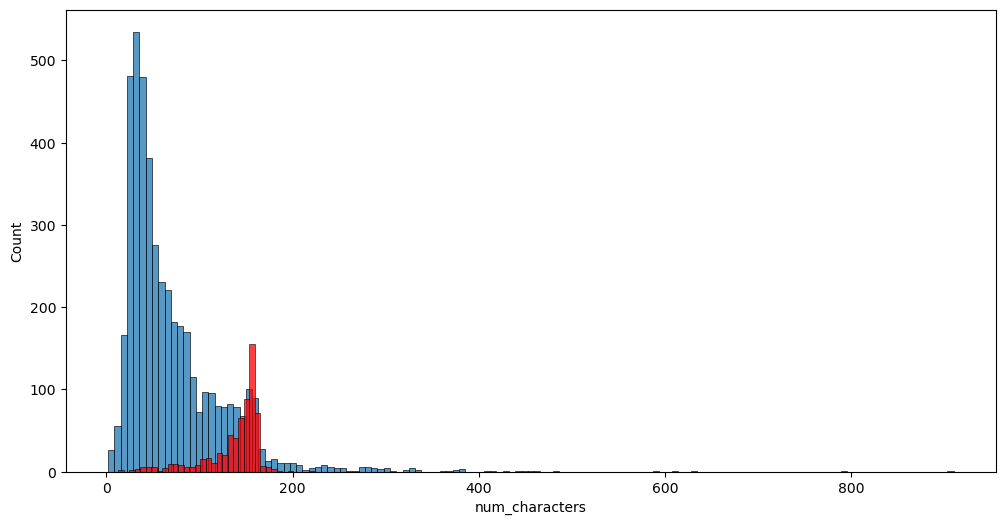

In [76]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

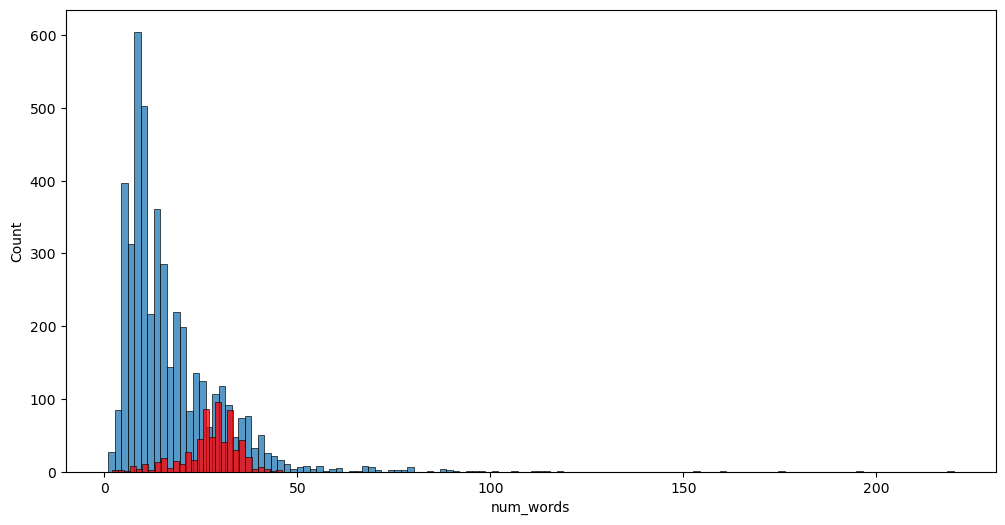

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

/Users/santhoshym/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


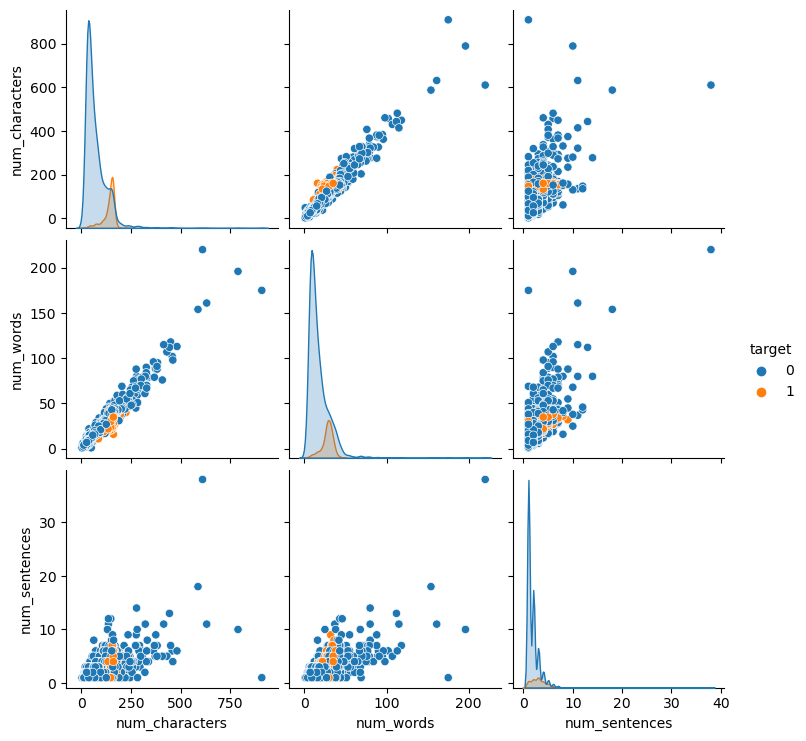

In [78]:
# to find the relationship b/w num of words and no of sentences.....
sns.pairplot(df, hue='target')

In [92]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

<Axes: >

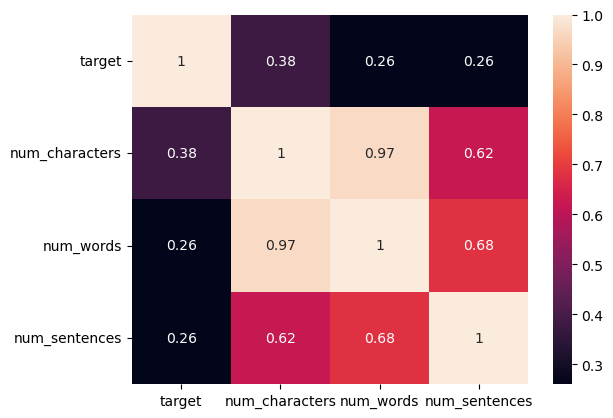

In [93]:
sns.heatmap(numeric_df.corr(), annot=True)

# 3. Data Preprocessing
. Lower case 
. Tokenization 
. removing special characters 
. Removing stop words and punctuation 
. Stemming

In [124]:
# Creating the New function which contains all these operations performed at once
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [113]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santhoshym/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [115]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [128]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [127]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [123]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [130]:
df['transformed_text'] = df['text'].apply(transform_text)

In [131]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [137]:
!pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151323 sha256=2a7d0af2170357af37831410c79902362fe33cb1ec3c683a6cb3083bfcfb2d2c
  Stored in directory: /Users/santhoshym/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud


In [143]:
# Word cloud ( Imp words are highlighted)
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [144]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep= " "))

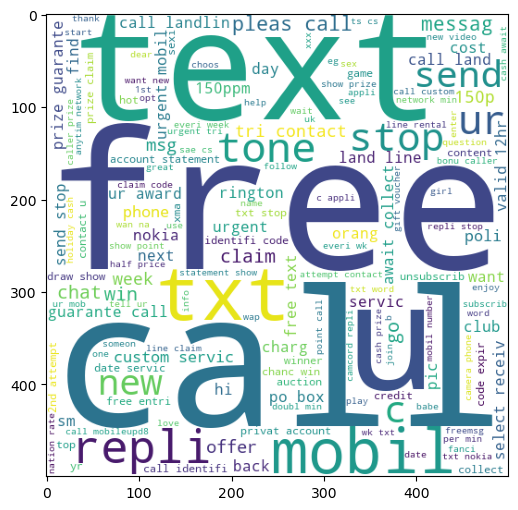

In [147]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [148]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep= " "))

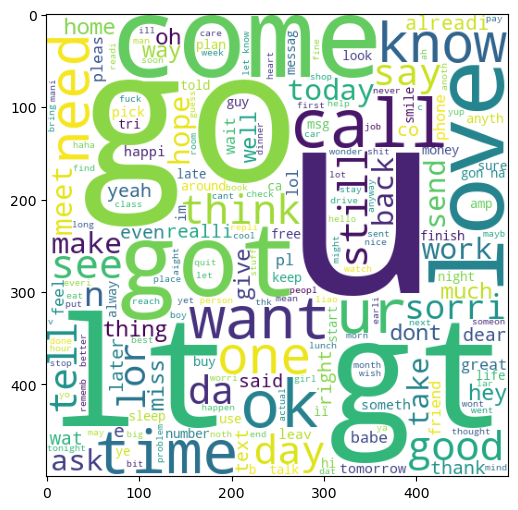

In [149]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [201]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

Counter(spam_corpus).most_common(30)

[('call', 313),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 117),
 ('mobil', 110),
 ('stop', 104),
 ('repli', 103),
 ('claim', 97),
 ('4', 95),
 ('prize', 79),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 59),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 54),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 49),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('collect', 42)]

In [158]:
len(spam_corpus)

9765

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [202]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word) 

Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [198]:
len(ham_corpus)

35404

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

 using Naive Bayes

In [246]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [245]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [228]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [247]:
X.shape

(5158, 6708)

In [248]:
y = df['target'].values

In [249]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [252]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [253]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [254]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874031007751938
[[792 111]
 [ 19 110]]
0.497737556561086


In [255]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9641472868217055
[[903   0]
 [ 37  92]]
1.0


In [256]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9748062015503876
[[902   1]
 [ 25 104]]
0.9904761904761905


In [239]:
# tfidf ---> MNB

In [260]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/13/94/f73d4efcc9a0272ea9f93c03f4744a2b709172309cd0bfde1e9012776330/xgboost-2.0.1-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.1 MB/s eta 0:00:0000:0100:01


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [262]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [263]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [264]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [266]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738372093023255, 0.9903846153846154)

In [267]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738372093023255
Precision -  0.9903846153846154
For  KN
Accuracy -  0.9069767441860465
Precision -  1.0
For  NB
Accuracy -  0.9641472868217055
Precision -  1.0
For  DT
Accuracy -  0.9447674418604651
Precision -  0.86
For  LR
Accuracy -  0.9534883720930233
Precision -  0.945054945054945
For  RF
Accuracy -  0.9699612403100775
Precision -  1.0
For  AdaBoost
Accuracy -  0.9612403100775194
Precision -  0.9158878504672897
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8869565217391304
For  ETC
Accuracy -  0.9718992248062015
Precision -  1.0
For  GBDT
Accuracy -  0.9573643410852714
Precision -  0.9775280898876404
For  xgb
Accuracy -  0.9689922480620154
Precision -  0.9619047619047619


In [280]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [281]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906977,1.000000
2,NB,0.964147,1.000000
5,RF,0.969961,1.000000
8,ETC,0.971899,1.000000
0,SVC,0.973837,0.990385
9,GBDT,0.957364,0.977528
10,xgb,0.968992,0.961905
4,LR,0.953488,0.945055
6,AdaBoost,0.961240,0.915888
7,BgC,0.961240,0.886957


In [282]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906977
1,NB,Accuracy,0.964147
2,RF,Accuracy,0.969961
3,ETC,Accuracy,0.971899
4,SVC,Accuracy,0.973837
5,GBDT,Accuracy,0.957364
6,xgb,Accuracy,0.968992
7,LR,Accuracy,0.953488
8,AdaBoost,Accuracy,0.961240
9,BgC,Accuracy,0.961240


/Users/santhoshym/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


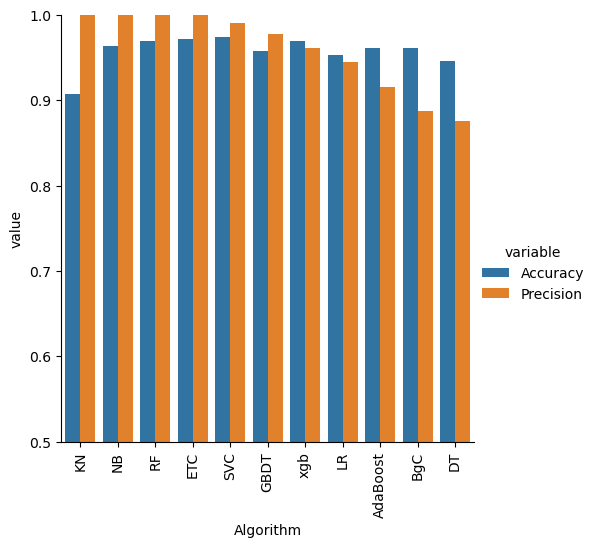

In [283]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Improving the Model

Change the max_feature parameter in TFIDF.

In [284]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [285]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906977,1.000000,0.906977,1.000000,0.906977,1.000000,0.906977,1.000000
1,NB,0.964147,1.000000,0.964147,1.000000,0.964147,1.000000,0.964147,1.000000
2,RF,0.969961,1.000000,0.969961,1.000000,0.969961,1.000000,0.969961,1.000000
3,ETC,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
4,SVC,0.973837,0.990385,0.973837,0.990385,0.973837,0.990385,0.973837,0.990385
5,GBDT,0.957364,0.977528,0.957364,0.977528,0.957364,0.977528,0.957364,0.977528
6,xgb,0.968992,0.961905,0.968992,0.961905,0.968992,0.961905,0.968992,0.961905
7,LR,0.953488,0.945055,0.953488,0.945055,0.953488,0.945055,0.953488,0.945055
8,AdaBoost,0.961240,0.915888,0.961240,0.915888,0.961240,0.915888,0.961240,0.915888
9,BgC,0.961240,0.886957,0.961240,0.886957,0.961240,0.886957,0.961240,0.886957


In [286]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [287]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [288]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [289]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9786821705426356
Precision 1.0


In [290]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [291]:
from sklearn.ensemble import StackingClassifier

In [292]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))